# The Probability Density Function (PDF) - Lab

## Introduction

In this lab we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to: 

* Calculate the PDF from given dataset containing real valued random variables
* Plot density functions and comment on the shape of the plot
* Plot density functions using seaborn


## Let's get started!

We'll import all the required libraries for you for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

#### Import the dataset 'weight-height.csv' as pandas dataframe . Calculate the mean and standard deviation for weights and heights for male and female individually. 

Hint : Use your pandas dataframe subsetting skills like loc(), iloc() and groupby()

In [15]:
print(df.head())
print(female_df.head())

  Gender     Height      Weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473
2   Male  74.110105  212.740856
3   Male  71.730978  220.042470
4   Male  69.881796  206.349801
      Gender     Height      Weight
5000  Female  58.910732  102.088326
5001  Female  65.230013  141.305823
5002  Female  63.369004  131.041403
5003  Female  64.479997  128.171511
5004  Female  61.793096  129.781407


In [66]:
df = pd.read_csv('weight-height.csv')
male_df =  df.loc[df['Gender']=='Male']
female_df =  df.loc[df['Gender']=='Female']

male_height_avg = male_df['Height'].mean()
male_height_sd = male_df['Height'].std()
male_weight_avg = male_df['Weight'].mean()
male_weight_sd = male_df['Weight'].std()

female_height_avg = female_df['Height'].mean()
female_height_sd = female_df['Height'].std()
female_weight_avg =female_df['Weight'].mean()
female_weight_sd = female_df['Weight'].std()

# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

#### Plot overlapping normalized histograms for male and female heights - use binsize = 10, set alpha level so that overlap can be visualized

In [42]:
#normalize
fem_height = female_df['Height']
mal_height = male_df['Height']

In [43]:
n, bins = np.histogram(mal_height, 20, density =1)

C:\Users\Thien Nguyen\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Height Data Both Sexes')

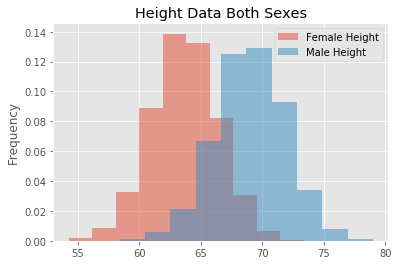

In [45]:
plt.hist(female_df['Height'], bins = 10, normed =True, alpha =.5, label = 'Female Height')
plt.hist(male_df['Height'], bins = 10, alpha =.5, normed= True, label = 'Male Height')
plt.ylabel('Frequency')
plt.legend()
plt.title('Height Data Both Sexes')

In [ ]:
# Record your observations - are these inline with your personal observations?
#Yes, most females tend to be shorter than males with a particular overlap about 65-67 inches.


#### Write a function density() that takes in a random variable and calculates the density function using `np.hist` and interpolation. The function should return two lists carrying x and y coordinates for plotting the density functio

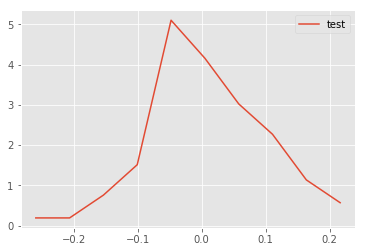

In [99]:
def density(x):
    n, bins = np.histogram(x, 10, density =1)
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)
    
    for k in range(n.size):
        pdfx[k] = .5*(bins[k] + bins[k+1])
        pdfy[k] = n[k]
        
    return pdfx, pdfy


# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

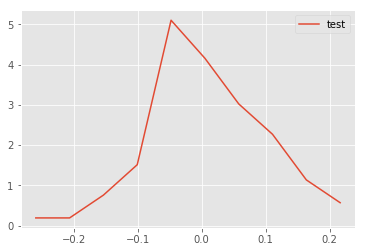

#### Add Overlapping density plots for male and female heights to the histograms plotted earlier

C:\Users\Thien Nguyen\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


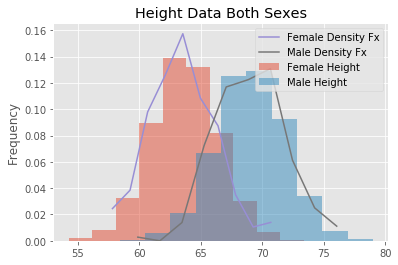

In [105]:
#Histogram of Sexes
plt.hist(female_df['Height'], bins = 10, normed =True, alpha =.5, label = 'Female Height')
plt.hist(male_df['Height'], bins = 10, alpha =.5, normed= True, label = 'Male Height')
plt.ylabel('Frequency')
plt.title('Height Data Both Sexes')


mu1, sigma1 = female_height_avg, female_height_sd
random_female = np.random.normal(mu1, sigma1, 200)
x1,y1 = density(random_female)
plt.plot(x1,y1, label = 'Female Density Fx')

mu2, sigma2 = male_height_avg, male_height_sd
random_male = np.random.normal(mu2, sigma2, 200)
x2, y2 = density(random_male)
plt.plot(x2,y2, label = 'Male Density Fx')

plt.legend()

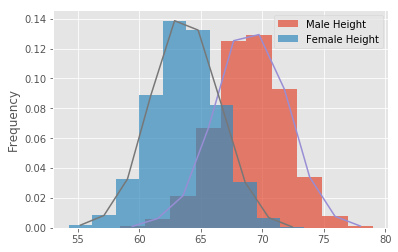

#### Repeat above exerice for male and female weights

C:\Users\Thien Nguyen\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


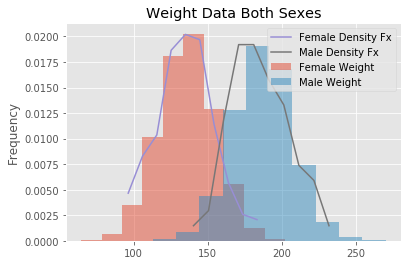

In [106]:
#Histogram of Sexes
plt.hist(female_df['Weight'], bins = 10, normed =True, alpha =.5, label = 'Female Weight')
plt.hist(male_df['Weight'], bins = 10, alpha =.5, normed= True, label = 'Male Weight')
plt.ylabel('Frequency')
plt.title('Weight Data Both Sexes')


mu1, sigma1 = female_weight_avg, female_weight_sd
random_female = np.random.normal(mu1, sigma1, 200)
x1,y1 = density(random_female)
plt.plot(x1,y1, label = 'Female Density Fx')

mu2, sigma2 = male_weight_avg, male_weight_sd
random_male = np.random.normal(mu2, sigma2, 200)
x2, y2 = density(random_male)
plt.plot(x2,y2, label = 'Male Density Fx')

plt.legend()

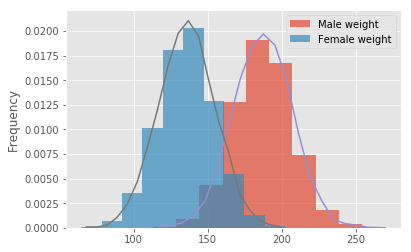

#### Write your observations in the cell below.

In [68]:
# Record your observations - are these inline with your personal observations?
#Yes these are inline with common observations

# So whats the takeaway when comparing male and female heights and weights 
#Males tend to be both heavier and taller than females, but there is more overlap with height around 65-67 inches and less
#overlap with weight around 150-170lbs


#### Repeat Above experiments in seaborn and compare with your results. 

C:\Users\Thien Nguyen\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Thien Nguyen\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


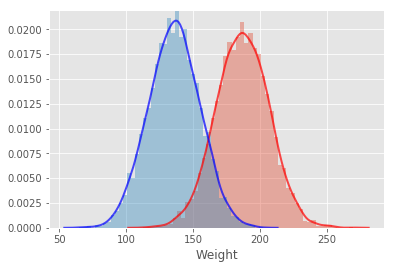

In [119]:
import seaborn as sns
sns.distplot(male_df['Weight'], kde=True, kde_kws={'linewidth': 2, 'color': 'red', 'alpha': .7})
sns.distplot(female_df['Weight'], kde=True, kde_kws={'linewidth': 2, 'color': 'blue', 'alpha': .7})

Text(0.5,1,'Comparing Weights')

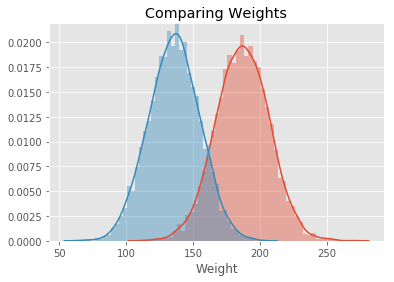

In [120]:
# Your comments on the two approaches here
# are they similar ? what makes them different if they are ?
# The interpolation approach is bit more inaccurate, but can be made more accurate if bins are increased
#however, seaborn is significantly quicker and more efficent. 

## Summary

In this lesson we saw how to build the probability density curves visually for given datasets and compare on the distribution visually by looking at the spread , center and overlap between data elements. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.